# NHL TEAMS PREDICT WINS (Machine Learning)

### Importing relevant libraries

In [70]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as sm
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

### Importing relevant .csv files

In [71]:
#import data set containing NHL team statistics from 2005-2022
# remove first row due to unrelevant info to model
team_stats = pd.read_csv("C:/Users/joele/OneDrive/Documents/Data Science/Portfolio/NHL_Team_Statistics_2000-2021.csv", skiprows=1) 

### Data cleaning

In [72]:
team_stats = team_stats.rename(columns=lambda x: x.strip())

team_stats['Team'] = team_stats['Team'].apply(lambda x: re.sub(r'\*', '', x))
# Remove '*' from team names, using regrex

team_stats = team_stats.dropna()
# Removing Nan data which can ruin ML model

team_stats_2021_2022 = team_stats[-32:][['Team', 'W']].copy()
team_stats.drop(['Rk', 'Team', 'L', 'OL', 'AvAge', 'SOW', 'SOL'], axis=1, inplace=True)

# Removing data unrelated to win/loss as well as data defining types of wins/loss (eg: shootout win) as these are possible y_variables
# for future models. Removing 'team' because player trades, coach changes and many other factors can cause a teams' status to change from 
# season to season and thus is not a strong variable to base future predictions.


### Machine Learning Model Preperation

In [73]:
X_train = team_stats[:-32].drop(["W"], axis=1)
X_test = team_stats[-32:].drop(["W"], axis=1)

y_train = team_stats[:-32]["W"]
y_test = team_stats[-32:]["W"]

# Setting train/test like this because final 31 rows are all the teams in the 2021/2022 season

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Normalizing the data  to avoid the model overrating variables

### Applying Linear Regression

In [74]:
linreg = LinearRegression().fit(X_train_scaled, y_train)
win_prediction_linreg = linreg.predict(X_test_scaled)


print('Mean absolute error = ', round(sm.mean_absolute_error(y_test, win_prediction_linreg), 2)) 
print('Mean squared error = ', round(sm.mean_squared_error(y_test, win_prediction_linreg), 2)) 
print('Median absolute error = ', round(sm.median_absolute_error(y_test, win_prediction_linreg), 2)) 
print('Explain variance score = ', round(sm.explained_variance_score(y_test, win_prediction_linreg), 2)) 
print('R2 score = ', round(sm.r2_score(y_test, win_prediction_linreg), 2))

# Mean Square Error (MSE): good to use if you have a lot of outliers in the data. Not so relevant here as not many outliers.
# Median absolute error: represents the average of the absolute differences between prediction and actual observation.
# R2 score: indicate how many variables compared to the total variables the model predicted.
# Variance: measure of how far observed values differ from the average of predicted values.


Mean absolute error =  0.97
Mean squared error =  1.41
Median absolute error =  0.85
Explain variance score =  0.99
R2 score =  0.99


### Applying Ridge Regression

In [75]:
ridge = Ridge().fit(X_train_scaled, y_train)

win_prediction_ridge = ridge.predict(X_test_scaled)


print('Mean absolute error = ', round(sm.mean_absolute_error(y_test, win_prediction_ridge), 2)) 
print('Mean squared error = ', round(sm.mean_squared_error(y_test, win_prediction_ridge), 2)) 
print('Median absolute error = ', round(sm.median_absolute_error(y_test, win_prediction_ridge), 2)) 
print('Explain variance score = ', round(sm.explained_variance_score(y_test, win_prediction_ridge), 2)) 
print('R2 score = ', round(sm.r2_score(y_test, win_prediction_ridge), 2))

Mean absolute error =  1.33
Mean squared error =  2.38
Median absolute error =  1.22
Explain variance score =  0.98
R2 score =  0.98


### Applying Lasso Regression

In [76]:
lasso = Lasso().fit(X_train_scaled, y_train)

win_prediction_lasso = lasso.predict(X_test_scaled)


print('Mean absolute error = ', round(sm.mean_absolute_error(y_test, win_prediction_lasso), 2)) 
print('Mean squared error = ', round(sm.mean_squared_error(y_test, win_prediction_lasso), 2)) 
print('Median absolute error = ', round(sm.median_absolute_error(y_test, win_prediction_lasso), 2)) 
print('Explain variance score = ', round(sm.explained_variance_score(y_test, win_prediction_lasso), 2)) 
print('R2 score = ', round(sm.r2_score(y_test, win_prediction_lasso), 2))

Mean absolute error =  5.93
Mean squared error =  45.23
Median absolute error =  6.17
Explain variance score =  0.6
R2 score =  0.59


### Applying Neural Network

In [77]:
neural_network = MLPRegressor().fit(X_train_scaled, y_train)

win_prediction_neural_network = neural_network.predict(X_test_scaled)


print('Mean absolute error = ', round(sm.mean_absolute_error(y_test, win_prediction_neural_network), 2)) 
print('Mean squared error = ', round(sm.mean_squared_error(y_test, win_prediction_neural_network), 2)) 
print('Median absolute error = ', round(sm.median_absolute_error(y_test, win_prediction_neural_network), 2)) 
print('Explain variance score = ', round(sm.explained_variance_score(y_test, win_prediction_neural_network), 2)) 
print('R2 score = ', round(sm.r2_score(y_test, win_prediction_neural_network), 2))

Mean absolute error =  3.99
Mean squared error =  21.94
Median absolute error =  3.75
Explain variance score =  0.8
R2 score =  0.8


c:\Users\joele\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Applying Decision Tree 

In [78]:
decision_tree = DecisionTreeRegressor().fit(X_train_scaled, y_train)

win_prediction_decision_tree = decision_tree.predict(X_test_scaled)


print('Mean absolute error = ', round(sm.mean_absolute_error(y_test, win_prediction_decision_tree), 2)) 
print('Mean squared error = ', round(sm.mean_squared_error(y_test, win_prediction_decision_tree), 2)) 
print('Median absolute error = ', round(sm.median_absolute_error(y_test, win_prediction_decision_tree), 2)) 
print('Explain variance score = ', round(sm.explained_variance_score(y_test, win_prediction_decision_tree), 2)) 
print('R2 score = ', round(sm.r2_score(y_test, win_prediction_decision_tree), 2))

Mean absolute error =  1.62
Mean squared error =  3.81
Median absolute error =  1.0
Explain variance score =  0.97
R2 score =  0.97


### Applying Random Forest

In [79]:
random_forest = RandomForestRegressor().fit(X_train_scaled, y_train)

win_prediction_random_forest = random_forest.predict(X_test_scaled)


print('Mean absolute error = ', round(sm.mean_absolute_error(y_test, win_prediction_random_forest), 2)) 
print('Mean squared error = ', round(sm.mean_squared_error(y_test, win_prediction_random_forest), 2)) 
print('Median absolute error = ', round(sm.median_absolute_error(y_test, win_prediction_random_forest), 2)) 
print('Explain variance score = ', round(sm.explained_variance_score(y_test, win_prediction_random_forest), 2)) 
print('R2 score = ', round(sm.r2_score(y_test, win_prediction_random_forest), 2))

Mean absolute error =  1.22
Mean squared error =  2.04
Median absolute error =  1.34
Explain variance score =  0.98
R2 score =  0.98


In [80]:
knn = KNeighborsRegressor().fit(X_train_scaled, y_train)

win_prediction_knn = knn.predict(X_test_scaled)


print('Mean absolute error = ', round(sm.mean_absolute_error(y_test, win_prediction_knn), 2)) 
print('Mean squared error = ', round(sm.mean_squared_error(y_test, win_prediction_knn), 2)) 
print('Median absolute error = ', round(sm.median_absolute_error(y_test, win_prediction_knn), 2)) 
print('Explain variance score = ', round(sm.explained_variance_score(y_test, win_prediction_knn), 2)) 
print('R2 score = ', round(sm.r2_score(y_test, win_prediction_knn), 2))

Mean absolute error =  2.3
Mean squared error =  8.45
Median absolute error =  1.9
Explain variance score =  0.92
R2 score =  0.92


### Applying Gaussian Regression

In [81]:
gauss = GaussianProcessRegressor().fit(X_train_scaled, y_train)

win_prediction_gauss = gauss.predict(X_test_scaled)


print('Mean absolute error = ', round(sm.mean_absolute_error(y_test, win_prediction_gauss), 2)) 
print('Mean squared error = ', round(sm.mean_squared_error(y_test, win_prediction_gauss), 2)) 
print('Median absolute error = ', round(sm.median_absolute_error(y_test, win_prediction_gauss), 2)) 
print('Explain variance score = ', round(sm.explained_variance_score(y_test, win_prediction_gauss), 2)) 
print('R2 score = ', round(sm.r2_score(y_test, win_prediction_gauss), 2))


Mean absolute error =  2.3
Mean squared error =  7.17
Median absolute error =  2.21
Explain variance score =  0.94
R2 score =  0.93


In [82]:
team_stats_2021_2022.rename(columns={"W": "Wins"}, inplace=True)
team_stats_2021_2022['Linear Regression'] = win_prediction_ridge.astype(int)
team_stats_2021_2022['Ridge Regression'] = win_prediction_ridge.astype(int)
team_stats_2021_2022['Neural Network Regression'] = win_prediction_neural_network.astype(int)
team_stats_2021_2022['Lasso Regression'] = win_prediction_lasso.astype(int)
team_stats_2021_2022['Decision Tree Regression'] = win_prediction_decision_tree.astype(int)
team_stats_2021_2022['Random Forest Regression'] = win_prediction_random_forest.astype(int)
team_stats_2021_2022['KNN Regression'] = win_prediction_knn.astype(int)
team_stats_2021_2022['Gaussian Regression'] = win_prediction_gauss.astype(int)
# creating columns to convey prediction results for different regression models

print(team_stats_2021_2022['Linear Regression'].mean())
print(team_stats_2021_2022['Ridge Regression'].mean())
print(team_stats_2021_2022['Neural Network Regression'].mean())
print(team_stats_2021_2022['Lasso Regression'].mean())
print(team_stats_2021_2022['Decision Tree Regression'].mean())
print(team_stats_2021_2022['Random Forest Regression'].mean())
print(team_stats_2021_2022['KNN Regression'].mean())
print(team_stats_2021_2022['Gaussian Regression'].mean())

# The league average wins for 2021/2022 is 41 so we are looking for an average close to that. As can be seen here, all
# averages are very close to the league average so we dive in for a closer look to determine the most accurate model. 


40.59375
40.59375
40.03125
39.125
40.9375
40.5
40.65625
41.21875


Text(0, 0.5, 'Wins')

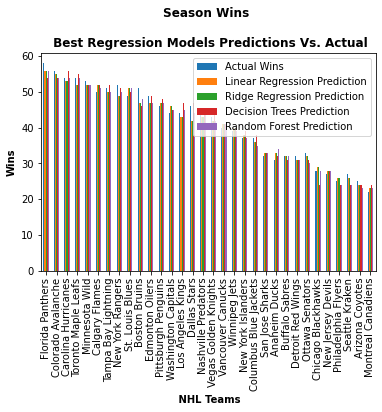

In [100]:
# plotting best regression models to observe the results more clearly

plotdata = pd.DataFrame({
    "Actual Wins": team_stats_2021_2022['Wins'].tolist(),
    "Linear Regression Prediction": team_stats_2021_2022['Linear Regression'].tolist(),
    'Decision Trees Prediction' : team_stats_2021_2022['Decision Tree Regression'].tolist(),
    'Random Forest Prediction': team_stats_2021_2022['Random Forest Regression'].tolist(),
    }, 
    index = team_stats_2021_2022['Team'].tolist()
)

plotdata.plot(kind="bar")
plt.title("Season Wins \n\n Best Regression Models Predictions Vs. Actual", fontweight="bold")
plt.xlabel(" NHL Teams", fontweight="bold")
plt.ylabel("Wins", fontweight="bold")

In [84]:
# team_stats_2021_2022.set_index(['Team', 'Wins'], inplace=True) 
# Set index to 'Team, Wins' for clarity

# Creating a multi index with "Wins Predictions" as title of all columns

def add_top_column(df, top_col, inplace=False):
    if not inplace:
        df = df.copy()
    
    df.columns = pd.MultiIndex.from_product([[top_col], df.columns])
    return df

results = add_top_column(team_stats_2021_2022, "Wins Predictions")
results

Wins Predictions                                          \
                      Team Wins Linear Regression Ridge Regression   
484       Florida Panthers   58                56               56   
485     Colorado Avalanche   56                55               55   
486    Carolina Hurricanes   54                53               53   
487    Toronto Maple Leafs   54                52               52   
488         Minnesota Wild   53                52               52   
489         Calgary Flames   50                52               52   
490    Tampa Bay Lightning   51                50               50   
491       New York Rangers   52                49               49   
492        St. Louis Blues   49                51               51   
493          Boston Bruins   51                47               47   
494        Edmonton Oilers   49                47               47   
495    Pittsburgh Penguins   46                47               47   
496    Washington Capitals   44                46               46   
497      Los Angeles Kings   44                43               43   
498           Dallas Stars   46                42               42   
499    Nashville Predators   45                43               43   
500   Vegas Golden Knights   43                42               42   
501      Vancouver Canucks   40                41               41   
502          Winnipeg Jets   39                40               40   
503     New York Islanders   37                38               38   
504  Columbus Blue Jackets   37                36               36   
505        San Jose Sharks   32                33               33   
506          Anaheim Ducks   31                33               33   
507         Buffalo Sabres   32                32               32   
508      Detroit Red Wings   32                31               31   
509        Ottawa Senators   33                32               32   
510     Chicago Blackhawks   28                29               29   
511      New Jersey Devils   27                28               28   
512    Philadelphia Flyers   25                26               26   
513         Seattle Kraken   27                26               26   
514        Arizona Coyotes   25                24               24   
515     Montreal Canadiens   22                23               23   

                                                                         \
    Neural Network Regression Lasso Regression Decision Tree Regression   
484                        52               45                       54   
485                        50               45                       54   
486                        46               44                       56   
487                        49               44                       55   
488                        46               43                       52   
489                        48               43                       52   
490                        46               43                       52   
491                        45               43                       51   
492                        49               43                       50   
493                        42               42                       46   
494                        46               42                       49   
495                        44               41                       48   
496                        43               41                       45   
497                        38               41                       47   
498                        38               40                       47   
499                        44               40                       44   
500                        39               40                       44   
501                        39               39                       41   
502                        40               39                       40   
503                        40               38        

It appears that the Linear Regression model is most accurate 